#NAME: ANKITH VIJAY

#1.

100%|██████████| 9912422/9912422 [00:00<00:00, 302514015.78it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 44420863.16it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 128402580.65it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 26312885.04it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw


Training network with 1 hidden units and 0.1 dropout rate
Epoch 1 Train Accuracy: 0.0989 Test Accuracy: 0.1032
Epoch 2 Train Accuracy: 0.0992 Test Accuracy: 0.1032
Epoch 3 Train Accuracy: 0.0948 Test Accuracy: 0.1032
Epoch 4 Train Accuracy: 0.1 Test Accuracy: 0.1032
Epoch 5 Train Accuracy: 0.0942 Test Accuracy: 0.0982
Epoch 6 Train Accuracy: 0.0997 Test Accuracy: 0.1032
Epoch 7 Train Accuracy: 0.0992 Test Accuracy: 0.1032
Epoch 8 Train Accuracy: 0.096 Test Accuracy: 0.1032
Epoch 9 Train Accuracy: 0.0966 Test Accuracy: 0.1032
Epoch 10 Train Accuracy: 0.093 Test Accuracy: 0.1032
Epoch 11 Train Accuracy: 0.0981 Test Accuracy: 0.1032
Epoch 12 Train Accuracy: 0.0939 Test Accuracy: 0.0974
Epoch 13 Train Accuracy: 0.0907 Test Accuracy: 0.1032
Epoch 14 Train Accuracy: 0.0956 Test Accuracy: 0.1032
Epoch 15 Train Accuracy: 0.0981 Test Accuracy: 0.101
Epoch 16 Train Accuracy: 0.0936 Test Accuracy: 0.098
Epoch 17 Train Acc

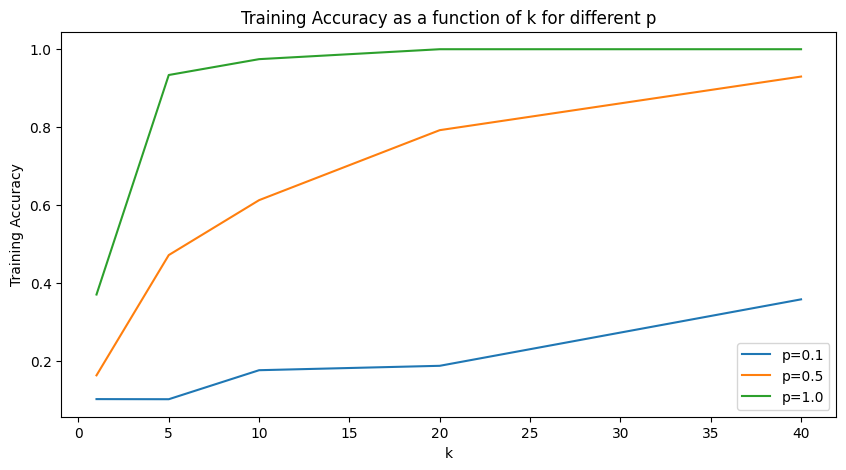

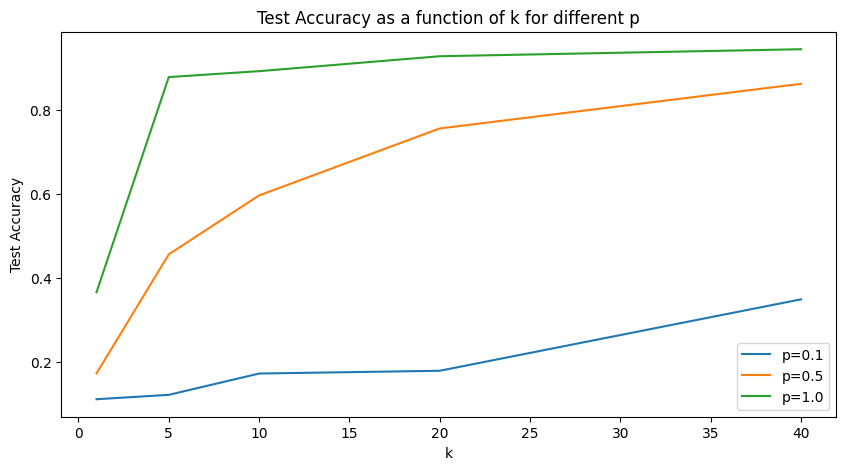

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt


class Net(nn.Module):
    def __init__(self, k, p):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, k)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(k, 10)
        self.dropout = nn.Dropout(p)
    
    def forward(self, x):
        x = x.view(-1, 28*28)  
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


def train_model(net, trainloader, testloader, criterion, optimizer):
    train_acc = []
    test_acc = []
    for epoch in range(80):  
        correct_train = 0
        total_train = 0
        for data in trainloader:
            
            inputs, labels = data


            optimizer.zero_grad()


            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()


            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()


        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        train_acc.append(correct_train / total_train)
        test_acc.append(correct_test / total_test)
        print(f"Epoch {epoch+1} Train Accuracy: {train_acc[-1]} Test Accuracy: {test_acc[-1]}")

    return net, train_acc, test_acc


mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
]))
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
]))


idx = np.array([], dtype=int)
for i in range(10):
    idx_i = np.where(np.array(mnist_train.targets) == i)[0][:1000]
    idx = np.concatenate((idx, idx_i))

subset_train = Subset(mnist_train, idx)

trainloader = DataLoader(subset_train, batch_size=32, shuffle=True)
testloader = DataLoader(mnist_test, batch_size=32, shuffle=True)


k_values = [1, 5, 10, 20, 40]
p_values = [0.1, 0.5, 1.0]

results = {}

for k in k_values:
    for p in p_values:
        net = Net(k, 1-p)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters())
        
        print(f"\nTraining network with {k} hidden units and {p} dropout rate")
        net, train_acc, test_acc = train_model(net, trainloader, testloader, criterion, optimizer)
        
        results[(k,p)] = (train_acc, test_acc)



plt.figure(figsize=(10, 5))
for p in p_values:
    train_accuracies = [results[(k,p)][0][-1] for k in k_values]
    plt.plot(k_values, train_accuracies, label=f'p={p}')

plt.title("Training Accuracy as a function of k for different p")
plt.xlabel("k")
plt.ylabel("Training Accuracy")
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
for p in p_values:
    test_accuracies = [results[(k,p)][1][-1] for k in k_values]
    plt.plot(k_values, test_accuracies, label=f'p={p}')

plt.title("Test Accuracy as a function of k for different p")
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()


1. As k increases the accuracy does increase. At network width of 5,10,20,40 and Dropout 1.0 the Training accuracy becomes 100 %
2. The dropout rate p in a neural network is the chance that any specific node in the network gets temporarily turned off during training. When a node is turned off, it doesn't get to play its part in learning from the data for that step.

  Here's how p affects training:

  * If p is small, like 0.1, only a few nodes get turned off each time. So, most of the network is still learning. This can make the model learn really well and increase training accuracy. But, there's a downside: the model might over-learn the training data and then do badly on new, unseen data (this is called overfitting).

  * If p is big, like 0.8, many nodes get turned off each time. This means the network doesn't get to learn as much, which might decrease training accuracy. But, the upside is that it keeps the model from over-learning the training data, and can help it perform better on new, unseen data.

  So, the dropout rate p helps balance learning and overfitting. It's a bit of trial and error to find the best p.

  Also, keep in mind that when we're using the model to make predictions (not training it), we turn off dropout so the whole network gets used. This gives us the most accurate predictions. Smaller 'p' makes the network easier to optimize. At k = 40 training accuracy becomes 100%.

3. Yes, higher the dropout higher the accuracy as we can see through the plot.(40,1.0) we get the best accuracy.

In [2]:

labels = mnist_train.targets.numpy()
noisy_labels = labels.copy()
num_noisy_labels = int(len(labels) * 0.4)
random_indices = np.random.choice(len(labels), size=num_noisy_labels, replace=False)

for idx in random_indices:
    possible_new_values = list(range(0, labels[idx])) + list(range(labels[idx] + 1, 10))
    noisy_labels[idx] = np.random.choice(possible_new_values)


mnist_train.targets = torch.tensor(noisy_labels)


In [3]:

idx = np.array([], dtype=int)
for i in range(10):
    idx_i = np.where(np.array(mnist_train.targets) == i)[0][:1000]
    idx = np.concatenate((idx, idx_i))

subset_train_noisy = Subset(mnist_train, idx)

trainloader_noisy = DataLoader(subset_train_noisy, batch_size=32, shuffle=True)



Training network with 1 hidden units and 0.1 dropout rate with noisy data
Epoch 1 Train Accuracy: 0.1 Test Accuracy: 0.0974
Epoch 2 Train Accuracy: 0.1 Test Accuracy: 0.0974
Epoch 3 Train Accuracy: 0.1 Test Accuracy: 0.0974
Epoch 4 Train Accuracy: 0.1 Test Accuracy: 0.0974
Epoch 5 Train Accuracy: 0.1 Test Accuracy: 0.0974
Epoch 6 Train Accuracy: 0.1 Test Accuracy: 0.0974
Epoch 7 Train Accuracy: 0.1 Test Accuracy: 0.0974
Epoch 8 Train Accuracy: 0.1 Test Accuracy: 0.0974
Epoch 9 Train Accuracy: 0.1 Test Accuracy: 0.0974
Epoch 10 Train Accuracy: 0.0967 Test Accuracy: 0.0974
Epoch 11 Train Accuracy: 0.0931 Test Accuracy: 0.0974
Epoch 12 Train Accuracy: 0.0902 Test Accuracy: 0.0974
Epoch 13 Train Accuracy: 0.0949 Test Accuracy: 0.1135
Epoch 14 Train Accuracy: 0.0938 Test Accuracy: 0.1135
Epoch 15 Train Accuracy: 0.0924 Test Accuracy: 0.101
Epoch 16 Train Accuracy: 0.0928 Test Accuracy: 0.0892
Epoch 17 Train Accuracy: 0.0964 Test Accuracy: 0.1135
Epoch 18 Train Accuracy: 0.0973 Test Accurac

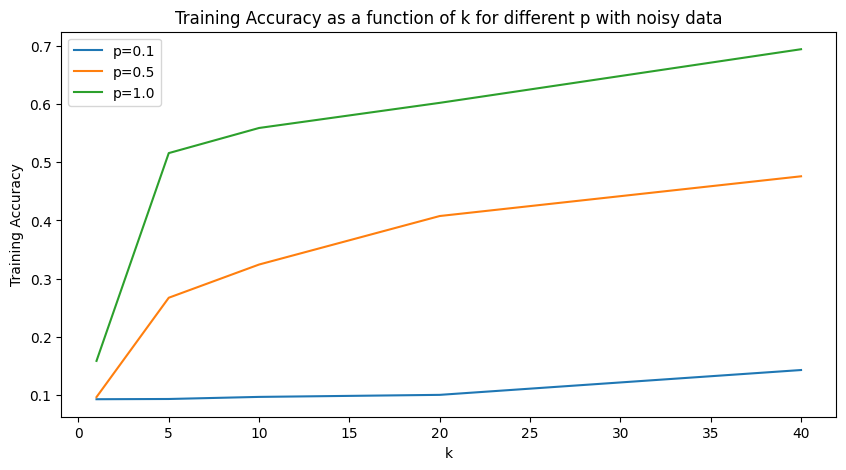

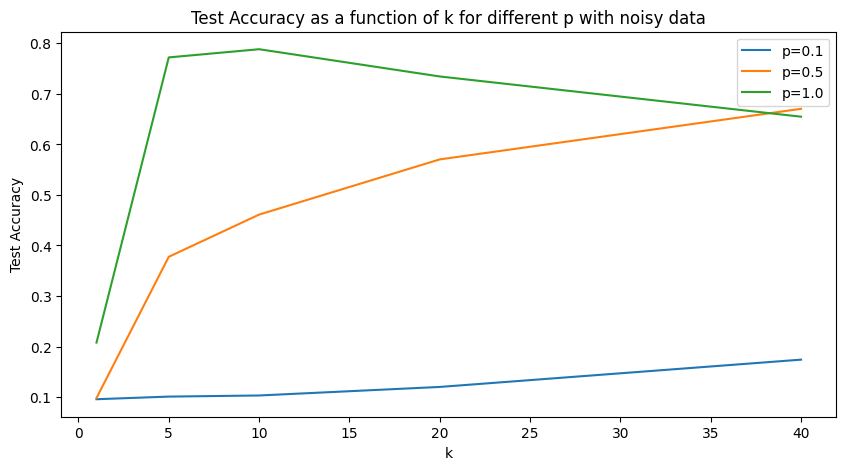

In [4]:

k_values = [1, 5, 10, 20, 40]
p_values = [0.1, 0.5, 1.0]

results_noisy = {}

for k in k_values:
    for p in p_values:
        net = Net(k, 1-p)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters())
        
        print(f"\nTraining network with {k} hidden units and {p} dropout rate with noisy data")
        net, train_acc, test_acc = train_model(net, trainloader_noisy, testloader, criterion, optimizer)
        
        results_noisy[(k,p)] = (train_acc, test_acc)


plt.figure(figsize=(10, 5))
for p in p_values:
    train_accuracies = [results_noisy[(k,p)][0][-1] for k in k_values]
    plt.plot(k_values, train_accuracies, label=f'p={p}')

plt.title("Training Accuracy as a function of k for different p with noisy data")
plt.xlabel("k")
plt.ylabel("Training Accuracy")
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
for p in p_values:
    test_accuracies = [results_noisy[(k,p)][1][-1] for k in k_values]
    plt.plot(k_values, test_accuracies, label=f'p={p}')

plt.title("Test Accuracy as a function of k for different p with noisy data")
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()


1. As you can see the model makes significant more errors while calculating loss and hence the train accuracy is less and the test accuracy is better. You can see that at Dropout 0.5 the accuracy goes higher than 1.0. 

2. Noise: Adding noise to the labels of the training data can create a more challenging learning environment for the model. This means the model will be trying to learn from incorrect examples, which can lead to reduced performance in terms of both training and testing accuracy.

  Training Accuracy: The model may not reach as high a training accuracy as before, because some of the examples it's trying to learn from are intentionally incorrect. It will try to fit these noisy examples, potentially leading to misleading weights and biases in the network.

  Testing Accuracy: The model's ability to generalize may be affected, leading to lower test accuracy. This is because the model could have learned incorrect patterns from the noisy training data, which do not apply to the clean test data.

3. Dropout setup of 0.5 is more useful in this scenario